In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="darkgrid") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-dark")     

# Part III: Temporal Structure
---
---

-----
## CH10: A Gentle Introduction to White Noise
-----

White noise is an important concept in time series forecasting. If a time series is white noise, it
is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not
white noise, it suggests improvements could be made to the predictive model. In this tutorial,
you will discover white noise time series with Python. After completing this tutorial, you will
know:

 - The definition of a white noise time series and why it matters.
 - How to check if your time series is white noise.
 - Statistics and diagnostic plots to identify white noise in Python.

### What is a White Noise?

A time series may be white noise. A time series is white noise if the variables are independent
and identically distributed with a mean of zero. This means that all variables have the same
variance `(sigma^2)` and each value has a zero correlation with all other values in the series. If
the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian
white noise.

### Why Does it Matter?

White noise is an important concept in time series analysis and forecasting. It is important for
two main reasons:

- **Predictability:** If your time series is white noise, then, by definition, it is random. You
cannot reasonably model it and make predictions.
- **Model Diagnostics:** The series of errors from a time series forecast model should ideally
be white noise.

Model Diagnostics is an important area of time series forecasting. Time series data are
expected to contain some white noise component on top of the signal generated by the underlying
process. For example:

$$y(t) = signal(t) + noise(t)$$

Once predictions have been made by a time series forecast model, they can be collected and
analyzed. The series of forecast errors should ideally be white noise. When forecast errors are
white noise, it means that all of the signal information in the time series has been harnessed by
the model in order to make predictions. All that is left is the random 
fluctuations that cannot
be modeled. A sign that model predictions are not white noise is an indication that further
improvements to the forecast model may be possible.

### Is your Time Series White Noise?

Your time series is not white noise if any of the following conditions are true:

- Does your series have a non-zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

Some tools that you can use to check if your time series is white noise are:
- Create a line plot. Check for gross features like a changing mean, variance, or obvious
relationship between lagged variables.
- Calculate summary statistics. Check the mean and variance of the whole series against
the mean and variance of meaningful contiguous blocks of values in the series (e.g. days,
months, or years).
- Create an autocorrelation plot. Check for gross correlation between lagged variables.

In [2]:
import random as rnd 
from pandas.plotting import autocorrelation_plot

rnd.seed(1)

wn_series = pd.Series([rnd.gauss(0,1) for i in range(1000)])

wn_series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

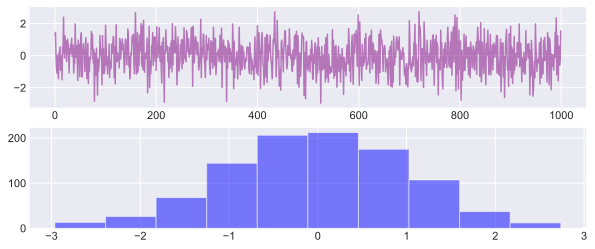

In [3]:
fig, axes = plt.subplots(2,1,figsize = (10,4))

axes[0].plot(wn_series, color = 'purple', alpha = 0.5)
axes[1].hist(wn_series,bins = 10, alpha = 0.5, color = 'blue')

axes[0].grid()
axes[1].grid()
plt.show()

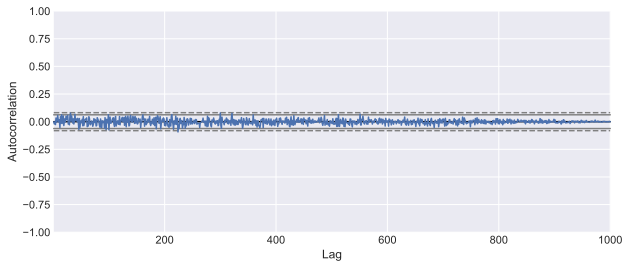

In [4]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(figsize = (10,4))

autocorrelation_plot(wn_series)

plt.show()

The correlogram does not show any obvious autocorrelation pattern. There are some spikes
above the 95% and 99% confidence level, but these are a statistical 
fluke.

----
## CH11: A Gentle Introduction to the Random Walk
----

How do you know your time series problem is predictable? This is a difficult question with
time series forecasting. There is a tool called a random walk that can help you understand the
predictability of your time series forecast problem. In this tutorial, you will discover the random
walk and its properties in Python. After completing this tutorial, you will know:

- What the random walk is and how to create one from scratch in Python.
- How to analyze the properties of a random walk and recognize when a time series is and
is not a random walk.
- How to make predictions for a random walk.

### Random Series:

The Python standard library contains the random module1 that provides access to a suite of
functions for generating random numbers. The `randrange()` function can be used to generate
a random integer between 0 and an upper limit. We can use the `randrange()` function to
generate a list of 1,000 random integers between 0 and 10.

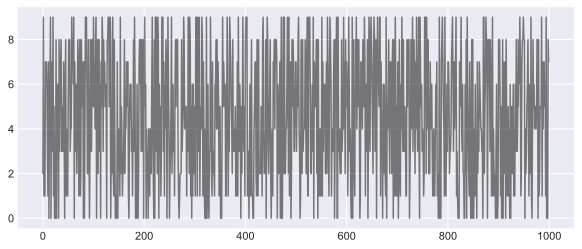

In [6]:
import random as rnd

rnd.seed(1)
rand_series = [rnd.randrange(10) for i in range(1000)]

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(rand_series,color = 'black', alpha = 0.5)

plt.grid()
plt.show()

This is not a random walk. It is just a sequence of random numbers also called white noise
(see Chapter 10). A common mistake that beginners make is to think that a random walk is a
list of random numbers, and this is not the case at all.

### Random Walk:

A random walk is different from a list of random numbers because the next value in the sequence
is a modification of the previous value in the sequence. The process used to generate the series
forces dependence from one-time step to the next. This dependence provides some consistency
from step-to-step rather than the large jumps that a series of independent, random numbers
provides. It is this dependency that gives the process its name as a *random walk* or a *drunkard's
walk*. A simple model of a random walk is as follows:

1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:
$$ y(t) = B0 + B1 \times X(t - 1) + e(t) $$

Where `y(t)` is the next value in the series. `B0` is a coefficient that is set to a value other
than zero adds a constant drift to the random walk. `B1` is a coefficient to weight the previous
time step and is set to 1.0. `X(t-1)` is the observation at the previous time step. `e(t)` is the
white noise or random fluctuation at that time. We can implement this in Python by looping
over this process and building up a list of 1,000 time steps for the random walk. The complete
example is listed below.

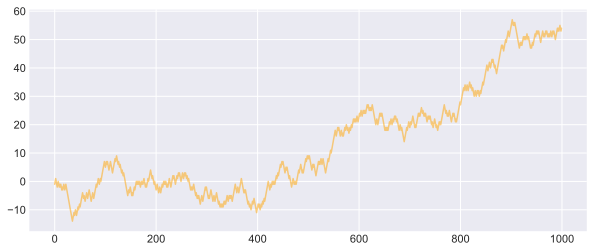

In [7]:
rnd.seed(1)

random_walk = list() # empty list for random walk
random_walk.append(-1 if rnd.random() < 0.5 else 1) # add B0

for i in range(1, 1000):
    
    movement = -1 if rnd.random() < 0.5 else 1
    
    value = random_walk[i-1] + movement # Random walk is a Markov Process, i.e future values only depend on the current (or the previous)
    
    random_walk.append(value)


fig, axes = plt.subplots(figsize = (10,4))

plt.plot(random_walk, color = 'orange', alpha = 0.5)
plt.grid()
plt.show()

Running the example creates a line plot of the random walk. We can see that it looks very
different from our above sequence of random numbers. In fact, the shape and movement looks
like a realistic time series for the price of a security on the stock market.

In the next sections, we will take a closer look at the properties of a random walk. This is
helpful because it will give you context to help identify whether a time series you are analyzing
in the future might be a random walk. Let's start by looking at the autocorrelation structure.

### Random Walk and Autocorrelation:

We can calculate the correlation between each observation and the observations at previous time
steps. A plot of these correlations is called an autocorrelation plot or a *correlogram*. Given the
way that the random walk is constructed, we would expect a strong autocorrelation with the
previous observation and a linear fall off from there with previous lag values. We can use the
`autocorrelation_plot()` function in Pandas to plot the correlogram for the random walk.

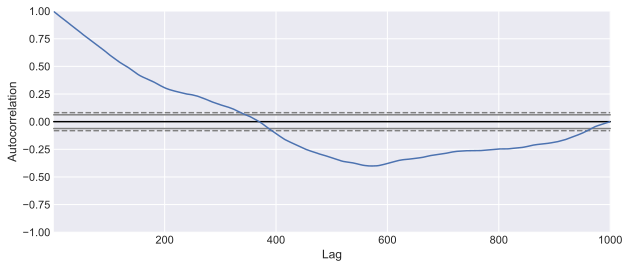

In [8]:
fig, axes = plt.subplots(figsize = (10,4))

autocorrelation_plot(random_walk)

plt.show()

Running the example, we generally see the expected trend, in this case across the  rst few
hundred lag observations.

### Random Walk and Stationarity: 

A stationary time series is one where the values are not a function of time (stationarity is
covered in more detail in Chapter 15). Given the way that the random walk is constructed and
the results of reviewing the autocorrelation, we know that the observations in a random walk
are dependent on time. The current observation is a random step from the previous observation.

Therefore we can expect a random walk to be non-stationary. In fact, all random walk
processes are non-stationary. Note that not all non-stationary time series are random walks.
Additionally, a non-stationary time series does not have a consistent mean and/or variance over
time. A review of the random walk line plot might suggest this to be the case. We can con rm
this using a statistical significance test, specifically the *Augmented Dickey-Fuller* test.

We can perform this test using the `adfuller()` function in the `statsmodels` library. The
complete example is listed below.

In [9]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(random_walk)

print(f"ADF statistic:{adf_test[0]}")
print(f"p-value to reject the null hypothesis (ts is non-stationary):{adf_test[1]:.3f}")

print('Critical Values:')
for key, value in adf_test[4].items():
    
    print(f"{key}: {value}")


ADF statistic:0.34160454935399814
p-value to reject the null hypothesis (ts is non-stationary):0.979
Critical Values:
1%: -3.4369127451400474
5%: -2.864437475834273
10%: -2.568312754566378


The null hypothesis of the test is that the time series is non-stationary. Running the example,
we can see that the test statistic value was 0.341605. This is larger than all of the critical values
at the 1%, 5%, and 10% con dence levels. Therefore, we can say that the time series does
appear to be non-stationary with a low likelihood of the result being a statistical 
fluke.

We can make the random walk stationary by taking the first difference of the series. That is replacing
each observation as the difference between it and the previous value. Given the way that this
random walk was constructed, we would expect this to result in a time series of -1 and 1 values.
This is exactly what we see. The complete example is listed below.

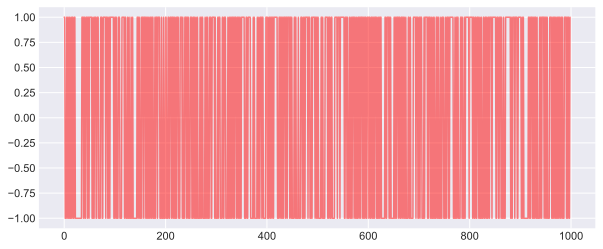

In [10]:
# take difference

first_diff = []

for i in range(1, len(random_walk)):
    
    value = random_walk[i] - random_walk[i - 1]
    
    first_diff.append(value)

# And plot 
    
fig, axes = plt.subplots(figsize = (10,4))

plt.plot(first_diff,color = 'red', alpha = 0.5)

plt.grid()
plt.show()

The plot of differenced series make it clear that there is no information/structure to learn in these series. 

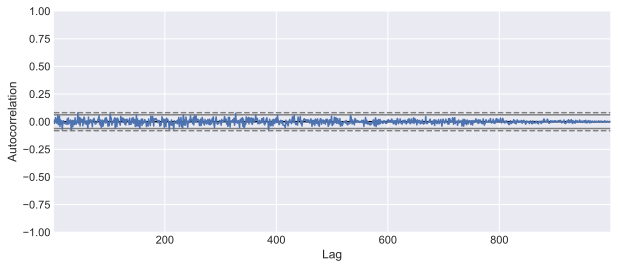

In [12]:
fig, axes = plt.subplots(figsize = (10,4))

autocorrelation_plot(first_diff)

plt.show()

no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. All correlations are small,
close to zero and below the 95% and 99% con dence levels (beyond a few statistical flukes).

### Predicting a Random Walk:

A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the
random walk is constructed, we can expect that the best prediction we could make would be to
use the observation at the previous time step as what will happen in the next time step. Simply
because we know that the next time step will be a function of the prior time step. This is often
called the `naive forecast`, or a `persistence model` (covered in Chapter 18).
We can implement this in Python by first splitting the dataset into train and test sets, then
using the persistence model to predict the outcome using a rolling forecast method. Once all
predictions are collected for the test set, the root mean squared error (RMSE) is calculated.

In [18]:
# prepare dataset

train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# persistence

predictions = list()

history = train[-1] # initiate the history with the last value of the training set, we will use it to predict the next


In [19]:
from sklearn.metrics import mean_squared_error

for i in range(len(test)):
    
    yhat = history # first prediction is set to the previous time step
    predictions.append(yhat) # populate the empty list of predictions
    history = test[i]        # update the history continuing on the values in the test set i.e the last time step

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


This result is expected as the variance between one-step to the next is 1. 

### Is Your Time Series a Random Walk?:

Your time series may be a random walk. Some ways to check if your time series is a random
walk are as follows:

- The time series shows a strong temporal dependence that decays linearly or in a similar
pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable
structure in the data.
- The persistence model provides the best source of reliable predictions.

This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly 
esh out whether you can do significantly better. If you can't, you're probably
working with a random walk. Many time series are random walks, particularly those of security
prices over time. The random walk hypothesis is a theory that stock market prices are a random
walk and cannot be predicted.

"A random walk is one in which future steps or directions cannot be predicted on the
basis of past history. When the term is applied to the stock market, it means that
short-run changes in stock prices are unpredictable." From the book titled `A Random Walk Down Wall Street`.

The human mind sees patterns everywhere and we must be vigilant that we are not fooling ourselves and wasting time by developing elaborate models for random walk processes.

----
## CH12: Decompose Time Series Data
----

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality,
and noise components. Decomposition provides a useful abstract model for thinking about time
series generally and for better understanding problems during time series analysis and forecasting.
In this tutorial, you will discover time series decomposition and how to automatically split a
time series into its components with Python. After completing this tutorial, you will know:

- The time series decomposition method of analysis and how it can help with forecasting.
- How to automatically decompose time series data in Python.
- How to decompose additive and multiplicative time series problems and plot the results.

### Time Series Components:

A useful abstraction for selecting forecasting methods is to break a time series down into
systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can
be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level,
trend, seasonality, and one non-systematic component called noise. These components are
de ned as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

### Combining Time Series Components:

A series is thought to be an aggregate or combination of these four components. All series have
a level and noise. The trend and seasonality components are optional. It is helpful to think of
the components as combining either additively or multiplicatively.

#### Additive Model

$$ y(t) = Level + Trend + Seasonality + Noise $$

An additive model is linear where changes over time are consistently made by the same
amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of
cycles) and amplitude (height of cycles).

#### Multiplicative Model

$$ y(t) = Level \times   Trend \times Seasonality \times Noise $$

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or
decrease over time. A nonlinear trend is a curved line. A nonlinear seasonality has an increasing
or decreasing frequency and/or amplitude over time.

### Decomposition as a Tool:

This is a useful abstraction. Decomposition is primarily used for time series analysis, and as
an analysis tool it can be used to inform forecasting models on your problem. It provides a
structured way of thinking about a time series forecasting problem, both generally in terms of
modeling complexity and specifically in terms of how to best capture each of these components
in a given model.

Each of these components are something you may need to think about and address during
data preparation, model selection, and model tuning. You may address it explicitly in terms of
modeling the trend and subtracting it from your data, or implicitly by providing enough history
for an algorithm to model a trend if it may exist. You may or may not be able to cleanly or
perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative
components. There may be an increasing trend followed by a decreasing trend. There may be
non-repeating cycles mixed in with the repeating seasonality components. Nevertheless, these
abstract models provide a simple framework that you can use to analyze your data and explore
ways to think about and forecast your problem.

### Automatic Time Series Decomposition: 

There are methods to automatically decompose a time series. The `Statsmodels` library pro-
vides an implementation of the naive, or classical, decomposition method in a function called
`seasonal_decompose()`. It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the
result. A review of a plot of the time series and some summary statistics can often be a good
start to get an idea of whether your time series problem looks additive or multiplicative. The
`seasonal_decompose()` function returns a result object. The result object contains arrays to
access four pieces of data from the decomposition.

For example, the snippet below shows how to decompose a series into trend, seasonal, and
residual components assuming an additive model. The result object provides access to the trend
and seasonal series as arrays. It also provides access to the residuals, which are the time series
after the trend, and seasonal components are removed. Finally, the original or observed data is
also stored.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ...
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

#### Additive Decomposition

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some
random noise and decompose it as an additive model. Because the time series was contrived
and was provided as an array of numbers, we must specify the frequency of the observations
(the `freq=1` argument). If a Pandas `Series` object is provided, this argument is not required.

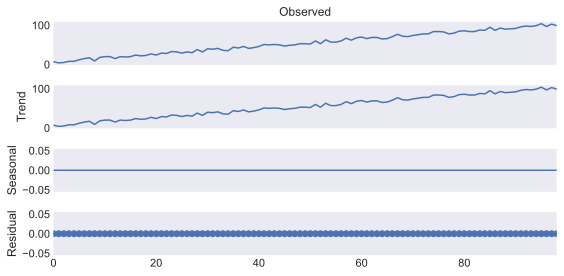

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

ex_list = [i + rnd.randrange(10) for i in range(1,100)]

series = pd.Series(ex_list)

result = seasonal_decompose(ex_list, model='additive', period = 1)

fig = result.plot()

fig.set_size_inches((8, 4))
# Tight layout to realign things
fig.tight_layout()
plt.show()


We can also see that the residual plot shows zero. This is a good example where the naive, or
classical, decomposition was able to separate the noise that we added from the linear trend.
The naive decomposition method is a simple one, and there are more advanced decompositions
available, like Seasonal and Trend decomposition using Loess or STL decomposition. Caution
and healthy skepticism is needed when using automated decomposition methods.

#### Multiplicative Decomposition

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then
decompose it assuming a multiplicative model.

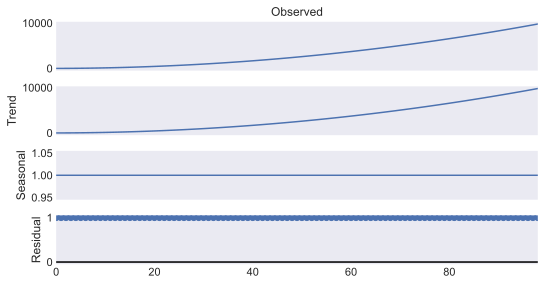

In [22]:

ex_qlist = [i**2.0 for i in range(1,100)]

resultq = seasonal_decompose(ex_qlist, model='multiplicative', period = 1)

figq = resultq.plot()

figq.set_size_inches((8, 4))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Exponential changes can be made linear by data transforms. In this case, a quadratic trend
can be made linear by taking the square root. An exponential growth in seasonality may be
made linear by taking the natural logarithm.
Again, it is important to treat decomposition as a potentially useful analysis tool, but to
consider exploring the many di erent ways it could be applied for your problem, such as on data
after it has been transformed or on residual model errors. Let's look at a real world dataset.

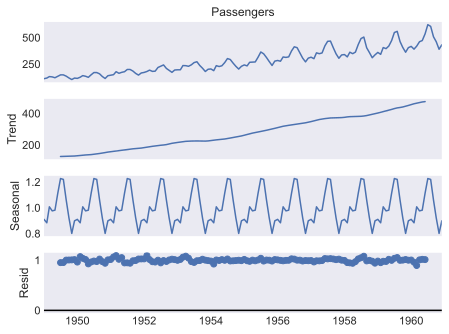

In [23]:
ap_df = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)

ap_series = ap_df.squeeze('columns')

result_ap = seasonal_decompose(ap_series, model='multiplicative')

fig_ap = result_ap.plot()

#fig_ap.set_size_inches((8, ))
# Tight layout to realign things
# fig_ap.tight_layout()
plt.show()

Running the example plots the observed, trend, seasonal, and residual time series. We can
see that the trend and seasonality information extracted from the series does seem reasonable.
The residuals are also interesting, showing periods of high variability in the early and later years
of the series.

----
## CH13: Use and Remove Trends
----

Our time series dataset may contain a trend. A trend is a continued increase or decrease in
the series over time. There can be benefit in identifying, modeling, and even removing trend
information from your time series dataset. In this tutorial, you will discover how to model and
remove trend information from time series data in Python. After completing this tutorial, you
will know:

- The importance and types of trends that may exist in time series and how to identify
them.
- How to use a simple di erencing method to remove a trend.
- How to model a linear trend and remove it from a sales time series dataset.

### Trends in Time Series:

A trend is a long-term increase or decrease in the level of the time series.
In general, a systematic change in a time series that does not appear to be periodic
is known as a trend.

Identifying and understanding trend information can aid in improving model performance;
below are a few reasons:

- **Faster Modeling:** Perhaps the knowledge of a trend or lack of a trend can suggest
methods and make model selection and evaluation more e cient.
- **Simpler Problem:** Perhaps we can correct or remove the trend to simplify modeling
and improve model performance.
- **More Data:** Perhaps we can use trend information, directly or as a summary, to provide
additional information to the model and improve model performance.

#### Types of Trends:

There are all kinds of trends. Two general classes that we may think about are:

- Deterministic Trends: These are trends that consistently increase or decrease.
- Stochastic Trends: These are trends that increase and decrease inconsistently.

In general, deterministic trends are easier to identify and remove, but the methods discussed
in this tutorial can still be useful for stochastic trends. We can think about trends in terms of
their scope of observations.

- Global Trends: These are trends that apply to the whole time series.
- Local Trends: These are trends that apply to parts or subsequences of a time series.
Generally, global trends are easier to identify and address.

#### Identifying a Trend:

You can plot time series data to see if a trend is obvious or not. The difficulty is that in practice,
identifying a trend in a time series can be a subjective process. As such, extracting or removing
it from the time series can be just as subjective. Create line plots of your data and inspect the
plots for obvious trends. Add linear and nonlinear trend lines to your plots and see if a trend is
obvious.

#### Removing a Trend:

A time series with a trend is called non-stationary. An identified trend can be modeled. Once
modeled, it can be removed from the time series dataset. This is called detrending the time
series. If a dataset does not have a trend or we successfully remove the trend, the dataset is
said to be trend stationary.

#### Using Time Series Trends in Machine Learning:

From a machine learning perspective, a trend in your data represents two opportunities:

- Remove Information: To remove systematic information that distorts the relationship
between input and output variables.
- Add Information: To add systematic information to improve the relationship between
input and output variables.

Specifically, a trend can be removed from your time series data (and data in the future) as a
data preparation and cleaning exercise. This is common when using statistical methods for time
series forecasting, but does not always improve results when using machine learning models.
Alternately, a trend can be added, either directly or as a summary, as a new input variable to
the supervised learning problem to predict the output variable.
One or both approaches may be relevant for your time series forecasting problem and may
be worth investigating. Next, let's take a look at a dataset that has a trend


In [24]:
from datetime import datetime # pandas.datetime will be deprecated 

def custom_parser(x):

    return datetime.strptime("190" + x, '%Y-%m')

ss_df = pd.read_csv('monthly-shampoo-sales.csv', index_col = 0, header = 0, parse_dates=True, date_parser = custom_parser)

ss_df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


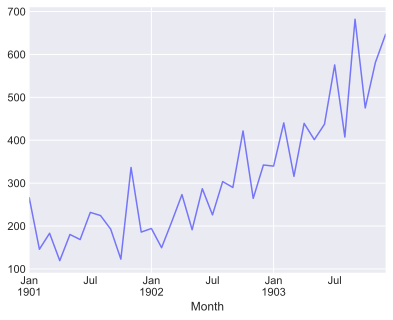

In [25]:
ss_series = ss_df.squeeze('columns')


ss_series.plot(color = 'blue', alpha = 0.5)

plt.grid()
plt.show()

### Detrend by Differencing:

Perhaps the simplest method to detrend a time series is by di erencing. Speci cally, a new
series is constructed where the value at the current time step is calculated as the di erence
between the original observation and the observation at the previous time step.

$$ value(t) = observation(t) - observation(t - 1) $$

This has the effect of removing a trend from a time series dataset. We can create a new
difference dataset in Python by implementing this directly. A new list of observations can be
created. Below is an example that creates the di erence detrended version of the Shampoo
Sales dataset.

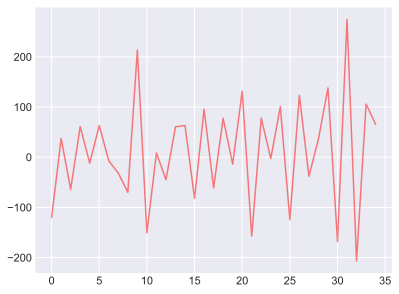

In [26]:
vals = ss_series.values

diff_vals = []

for i in range(1,len(vals)):
    
    diff_vals.append(vals[i]-vals[i-1])

plt.plot(diff_vals, color = 'red', alpha = 0.5)
plt.grid()
plt.show()

This approach works well for data with a linear trend. If the trend is quadratic (the change
in the trend also increases or decreases), then a difference of the already-differenced dataset can
be taken, a second level of differencing. This process can be further repeated if needed. Because
differencing only requires the observation at the previous time step, it can easily be applied to
unseen out-of-sample data to either pre-process or provide an additional input for supervised
learning. Next, we will look at  fitting a model to describe the trend.

### Detrend by Model Fitting: 

A trend is often easily visualized as a line through the observations. Linear trends can be
summarized by a linear model, and nonlinear trends may be best summarized using a polynomial
or other curve-fitting method. Because of the subjective and domain-specific nature of identifying
trends, this approach can help to identify whether a trend is present. Even  fitting a linear model
to a trend that is clearly super-linear or exponential can be helpful.

In addition to being used as a trend identification tool, these fit models can also be used to
detrend a time series. For example, a linear model can be fit on the time index to predict the
observation. 

The predictions from this model will form a straight line that can be taken as the trend
line for the dataset. These predictions can also be subtracted from the original time series to
provide a detrended version of the dataset.

$$value(t) = observation(t) - prediction(t) $$

The residuals from the fit of the model are a detrended form of the dataset. Polynomial
curve  fitting and other nonlinear models can also be used. We can implement this in Python by
training a scikit-learn LinearRegression model on the data.

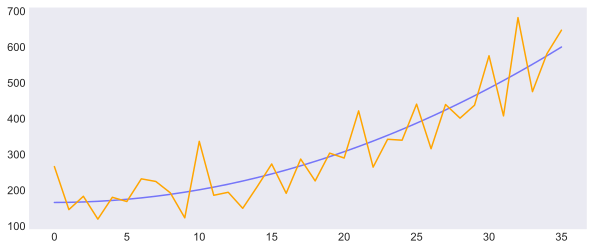

In [27]:
import numpy as np

from sklearn.linear_model import LinearRegression

# fit a (non-)linear model
X = [i**2 for i in range(0, len(ss_series))]

X = np.reshape(X, (len(X), 1)) # re-shape X to a vector of (len(X),1), i.e column vector

y_obs = ss_series.values

model = LinearRegression()
model.fit(X, y_obs)


# calculate trend
y_predict = model.predict(X)

fig, axes = plt.subplots(figsize = (10,4))

axes.plot(y_predict, color = 'blue', alpha = 0.5)
axes.plot(y_obs, color = 'orange')

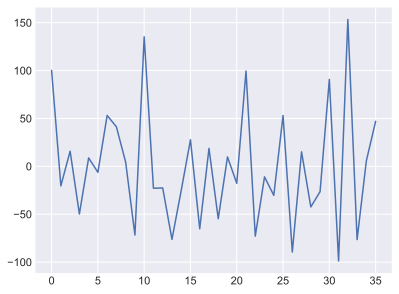

In [28]:
# detrend
detrended_series = [y_obs[i]-y_predict[i] for i in range(0, len(ss_series))]
# plot detrended
plt.plot(detrended_series)

plt.grid()
plt.show()

Again, we can see that this approach has effectively detrended the dataset. There may be a
parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job.(In fact a quadratic fit seems to detrend better)
Because the trend model takes only the integer index of the observation as input, it can be used
on new data to either detrend or provide a new input variable for the model.

----
## CH14: Use and Remove Seasonality
----

Time series datasets can contain a seasonal component. This is a cycle that repeats over time,
such as monthly or yearly. This repeating cycle may obscure the signal that we wish to model
when forecasting, and in turn may provide a strong signal to our predictive models. In this
tutorial, you will discover how to identify and correct for seasonality in time series data with
Python.

After completing this tutorial, you will know:

- The definition of seasonality in time series and the opportunity it provides for forecasting
with machine learning methods.
- How to use the difference method to create a seasonally adjusted time series of daily
temperature data.
- How to model the seasonal component directly and explicitly subtract it from observations.

### Seasonality in Time Series:

Time series data may contain seasonal variation. Seasonal variation, or seasonality, are cycles
that repeat regularly over time. A repeating pattern within each year is known as seasonal variation, although the
term is applied more generally to repeating patterns within any fixed period.

A cycle structure in a time series may or may not be seasonal. If it consistently repeats at
the same frequency, it is seasonal, otherwise it is not seasonal and is called a cycle.

#### Benefits to Machine Learning

Understanding the seasonal component in time series can improve the performance of modeling
with machine learning. This can happen in two main ways:

- Clearer Signal: Identifying and removing the seasonal component from the time series can
result in a clearer relationship between input and output variables.
- More Information: Additional information about the seasonal component of the time
series can provide new information to improve model performance.

Both approaches may be useful on a project. Modeling seasonality and removing it from the
time series may occur during data cleaning and preparation. Extracting seasonal information
and providing it as input features, either directly or in summary form, may occur during feature
extraction and feature engineering activities.

#### Types of Seasonality

There are many types of seasonality; for example:

- Time of Day.
- Daily.
- Weekly.
- Monthly.
- Yearly.

As such, identifying whether there is a seasonality component in your time series problem is
subjective. The simplest approach to determining if there is an aspect of seasonality is to plot
and review your data, perhaps at di erent scales and with the addition of trend lines.

#### Removing Seasonality

Once seasonality is identified, it can be modeled. The model of seasonality can be removed from
the time series. This process is called Seasonal Adjustment, or Deseasonalizing. A time series
where the seasonal component has been removed is called seasonal stationary. A time series
with a clear seasonal component is referred to as non-stationary.
There are sophisticated methods to study and extract seasonality from time series in the field
of Time Series Analysis. As we are primarily interested in predictive modeling and time series
forecasting, we are limited to methods that can be developed on historical data and available
when making predictions on new data. In this tutorial, we will look at two methods for making
seasonal adjustments on a classical meteorological-type problem of daily temperatures with a
strong additive seasonal component. Next, let's take a look at the dataset we will use in this
tutorial.

In this lesson, we will use the Minimum Daily Temperatures dataset as an example.

A simple way to correct for a seasonal component is to use differencing. If there is a seasonal
component at the level of one week, then we can remove it on an observation today by subtracting
the value from last week. In the case of the Minimum Daily Temperatures dataset, it looks like
we have a seasonal component each year showing swing from summer to winter.

We can subtract the daily minimum temperature from the same day last year to correct for
seasonality. This would require special handling of February 29th in leap years and would mean
that the first year of data would not be available for modeling.

In [29]:
dt_df = pd.read_csv('daily-min-temperatures.csv', index_col = 0, header = 0, parse_dates=True)

dt_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


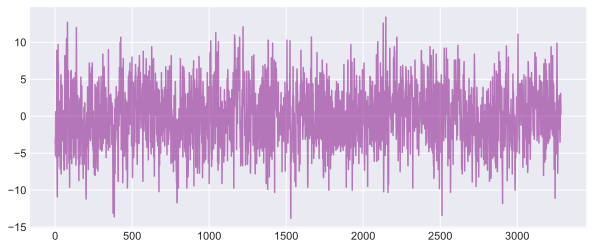

In [30]:
dt_series = dt_df.squeeze('columns')

X = dt_series.values

dt_diff = []

days_in_year = 365

for i in range(days_in_year, len(X)):

    dt_diff.append(X[i]-X[i - days_in_year])

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(dt_diff, color = 'purple', alpha = 0.5)
plt.grid()

There are two leap years in our dataset (1984 and 1988). They are not explicitly handled;
this means that observations in March 1984 onwards the offset are wrong by one day, and after
March 1988, the offsets are wrong by two days. One option is to update the code example to be
leap-day aware.

Another option is to consider that the temperature within any given period of the year
is probably stable. Perhaps over a few weeks. We can shortcut this idea and consider all
temperatures within a calendar month to be stable. An improved model may be to subtract the
average temperature from the same calendar month in the previous year, rather than the same
day. We can start off  by resampling the dataset to a monthly average minimum temperature.

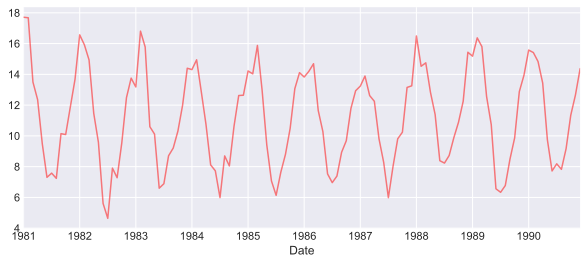

In [31]:
resamp_dt_series = dt_series.resample('M')

monthlymt_series = resamp_dt_series.mean()

fig, axes = plt.subplots(figsize = (10,4))

monthlymt_series.plot(color = 'red', alpha = 0.5)
plt.grid()

We can test the same differencing method on the monthly data and confirm that the
seasonally adjusted dataset does indeed remove the yearly cycles.

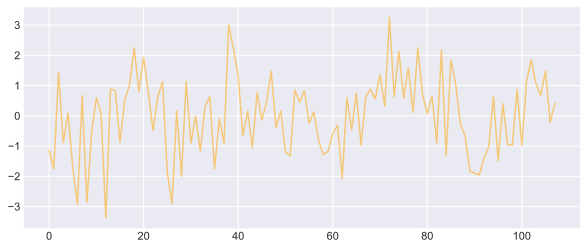

In [32]:
X_m = monthlymt_series.values

m_diff = []

month_in_year = 12

for i in range(month_in_year, len(X_m)): 

    m_diff.append(X_m[i]-X_m[i-month_in_year])

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(m_diff, color = 'orange', alpha =0.5)

plt.grid()

Next, we can use the monthly average minimum temperatures from the same month in the
previous year to adjust the daily minimum temperature dataset. Again, we just skip the first
year of data, but the correction using the monthly rather than the daily data may be a more
stable approach.

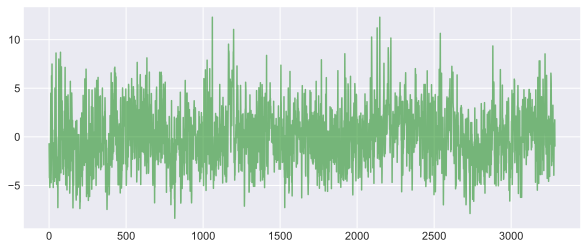

In [33]:
X = dt_series.values

dt_diff_MA = [] # daily temperature differencing list differenced by the monthly mean of the last year 

days_in_year = 365

for i in range(days_in_year, len(X)):

    month_str = str(dt_series.index[i].year-1)+'-'+str(dt_series.index[i].month)
    monthly_mean_last_year = dt_series[month_str].mean()
    dt_diff_MA.append(X[i]-monthly_mean_last_year)

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(dt_diff_MA, color = 'green', alpha = 0.5)
plt.grid()

Running the example again creates the seasonally adjusted dataset and plots the results.
This example is robust to daily fluctuations in the previous year and to offset errors creeping in
due to February 29 days in leap years.

The edge of calendar months provides a hard boundary that may not make sense for
temperature data. More 
exible approaches that take the average from one week either side of
the same date in the previous year may again be a better approach. Additionally, there is likely
to be seasonality in temperature data at multiple scales that may be corrected for directly or
indirectly, such as:

- Day level.
- Multiple day level, such as a week or weeks.
- Multiple week level, such as a month.
- Multiple month level, such as a quarter or season.

### Seasonal Adjustment with Modeling:

We can model the seasonal component directly, then subtract it from the observations. The
seasonal component in a given time series is likely a sine wave over a generally fixed period and
amplitude. This can be approximated easily using a curve-fitting method. A dataset can be constructed with the time index of the sine wave as an input, or x-axis, and the observation as the output, or y-axis.

Once  fit, the model can then be used to calculate a seasonal component for any time index.
In the case of the temperature data, the time index would be the day of the year. We can then
estimate the seasonal component for the day of the year for any historical observations or any
new observations in the future. The curve can then be used as a new input for modeling with
supervised learning algorithms, or subtracted from observations to create a seasonally adjusted
series.
Let's start off  by fitting a curve to the Minimum Daily Temperatures dataset. The NumPy
library provides the `polyfit()` function that can be used to fit a polynomial of a chosen order
to a dataset. First, we can create a dataset of time index (day in this case) to observation. We
could take a single year of data or all the years. Ideally, we would try both and see which model
resulted in a better fit. We could also smooth the observations using a moving average centered
on each value. This too may result in a model with a better fit.

Once the dataset is prepared, we can create the fit by calling the `polyfit()` function passing
the x-axis values (integer day of year), y-axis values (temperature observations), and the order
of the polynomial. The order controls the number of terms, and in turn the complexity of the
curve used to fit the data. Ideally, we want the simplest curve that describes the seasonality of
the dataset. For consistent sine wave-like seasonality, a 4th order or 5th order polynomial will
be sufficient. In this case, I chose an order of 4 by trial and error. The resulting model takes
the form:

$$y = (x^4 \times b1) + (x^3 \times b2) + (x^2 \times b3) + (x^1 \times b4) + b5 $$

Where `y` is the fit value, `x` is the time index (day of the year), and b1 to b5 are the coe cients
found by the curve- tting optimization algorithm. Once fit, we will have a set of coefficients
that represent our model. We can then use this model to calculate the curve for one observation,
one year of observations, or the entire dataset.

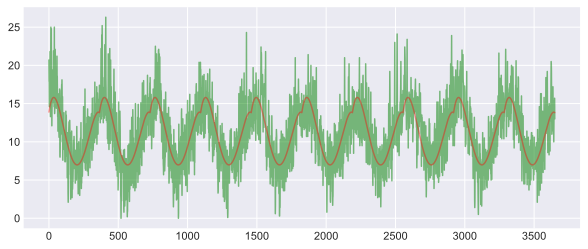

In [34]:
# fit polynomial: x^2*b1 + x*b2 + ... + bn

X = [i%365 for i in range(0, len(dt_series))] # use mode to reset the index at multiples of 365
y = dt_series.values

degree = 4

coefs = np.polyfit(X, y, degree) # coefficients of the fit

# create curve
curve = []

for i in range(len(X)):
    
    value = coefs[-1] # last values of the coefs is the constant term, i.e x^{0} term 
    
    for d in range(degree):
        
        value += X[i]**(degree-d) * coefs[d]
        
    curve.append(value)

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(dt_series.values, color = 'green', alpha = 0.5)
plt.plot(curve, color = 'red', alpha = 0.4)
plt.grid()

The curve appears to be a good fit for the seasonal structure in the dataset. We can now
use this model to create a seasonally adjusted version of the dataset. 

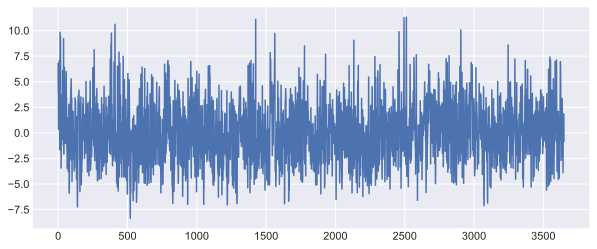

In [35]:
# create seasonally adjusted

values = dt_series.values
dt_diff = list()

for i in range(len(values)):
    dt_diff.append(values[i] - curve[i])

fig, axes = plt.subplots(figsize = (10,4))

plt.plot(dt_diff)

plt.grid()

----
## CH15: Stationarity in Time Series Data
----

Time series is different from more traditional classification and regression predictive modeling problems. The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically. For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary. These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures. In this tutorial, you will discover how to check if your time series is stationary with Python. After completing this tutorial, you will know:

- How to identify obvious stationary and non-stationary time series using line plot.
- How to spot-check summary statistics like mean and variance for a change over time.
- How to use statistical tests with statistical significance to check if a time series is stationary.

### Types of Stationary Time Series:

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting. There are some finer-grained notions of stationarity that you may come across if you dive deeper into this topic. They are:

- Stationary Process: A process that generates a stationary series of observations.
- Stationary Model: A model that describes a stationary series of observations.
- Trend Stationary: A time series that does not exhibit a trend.
- Seasonal Stationary: A time series that does not exhibit seasonality.
- Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

### Stationary Time Series and Forecasting:

Should you make your time series stationary? Generally, yes. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.
If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

Statistical time series methods and even modern machine learning methods will benefit from the clearer signal in the data. But...
We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.
The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

### Checks for Stationarity:

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

- Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
- Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

We will look at a quick and dirty way to calculate and review summary statistics on our time series dataset for checking to see if it is stationary.

### Summary Statistics:

A quick and dirty check to see if your time series is non-stationary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary. Next, let’s try this approach on the Daily Births dataset.

Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution. We can also quickly check this by eyeballing a histogram of our observations.

<Axes: >

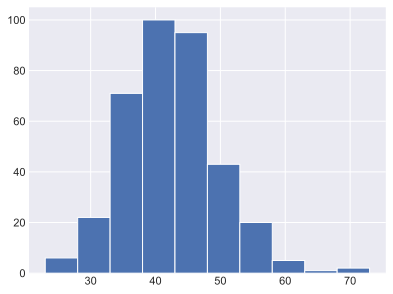

In [36]:
db_df = pd.read_csv('daily-total-female-births.csv', header = 0, index_col=0, parse_dates=True)

db_series = db_df.squeeze('columns')

db_series.hist()

Looks like a Gaussian distribution with a somewhat right skewed tail. 

In [37]:
X = db_series.values

split = int(len(X)/2)

X1, X2 = X[:split], X[split:]

X1m, X2m = X1.mean(), X2.mean()

X1var, X2var = X1.var(), X2.var()

print(f"variance 1: {X1var:.2f} and variance 2: {X2var:.2f} obtained by splitting the dataset from the middle")
print("\n")
print(f"mean 1: {X1m:.2f} and mean 2: {X2m:.2f} obtained by splitting the dataset from the middle")

variance 1: 49.21 and variance 2: 48.71 obtained by splitting the dataset from the middle


mean 1: 39.76 and mean 2: 44.19 obtained by splitting the dataset from the middle


Running this example shows that the mean and variance values are different, but in the same ball-park. Next, let’s try the same trick on the Airline Passengers dataset.

In [38]:
ap_df = pd.read_csv('airline-passengers.csv', header = 0, index_col=0, parse_dates=True)

ap_series = ap_df.squeeze('columns')

In [39]:
X = ap_series.values

split = int(len(X)/2)

X1, X2 = X[:split], X[split:]

X1m, X2m = X1.mean(), X2.mean()

X1var, X2var = X1.var(), X2.var()

print(f"variance 1: {X1var:.2f} and variance 2: {X2var:.2f} obtained by splitting the dataset from the middle")
print("\n")
print(f"mean 1: {X1m:.2f} and mean 2: {X2m:.2f} obtained by splitting the dataset from the middle")

variance 1: 2244.09 and variance 2: 7367.96 obtained by splitting the dataset from the middle


mean 1: 182.90 and mean 2: 377.69 obtained by splitting the dataset from the middle


Running the example, we can see the mean and variance look very different. We have a non-stationary time series. Well, maybe. Let’s take one step back and check if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

<Axes: >

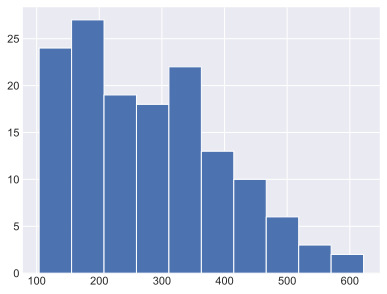

In [40]:
ap_series.hist()


Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution of the observations may be another indicator of a non-stationary time series.

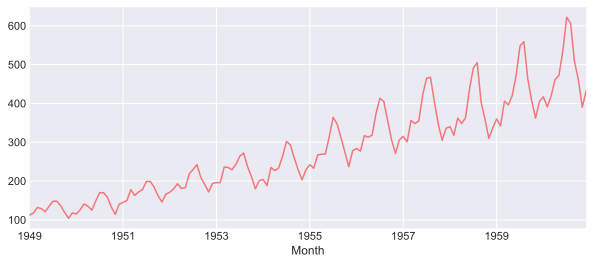

In [41]:
fig, axes = plt.subplots(figsize = (10,4))

ap_series.plot(color = 'red', alpha = 0.5)

plt.grid()

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship. Below is the same histogram with a log transform of the time series.

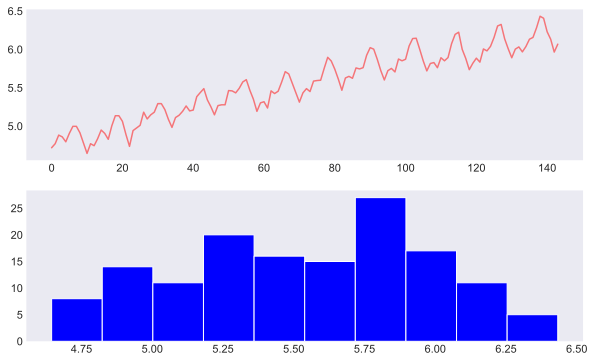

In [42]:
X = ap_series.values

LX = np.log(X)

fig, axes = plt.subplots(2,1,figsize = (10,6))

axes[0].plot(LX, color = 'red', alpha = 0.5)
axes[1].hist(LX, color = 'blue')

plt.show()

Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values. We also create a line plot of the log transformed data and can see the exponential growth seems diminished (compared to the line plot of the dataset in the Appendix), but we still have a trend and seasonal elements.

We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [43]:
split = int(len(X)/2)

X1, X2 = LX[:split], LX[split:]

X1m, X2m = X1.mean(), X2.mean()

X1var, X2var = X1.var(), X2.var()

print(f"variance 1: {X1var:.2f} and variance 2: {X2var:.2f} obtained by splitting the dataset from the middle")
print("\n")
print(f"mean 1: {X1m:.2f} and mean 2: {X2m:.2f} obtained by splitting the dataset from the middle")

variance 1: 0.07 and variance 2: 0.05 obtained by splitting the dataset from the middle


mean 1: 5.18 and mean 2: 5.91 obtained by splitting the dataset from the middle


Running the examples shows mean and standard deviation values for each group that are again similar, but not identical. Perhaps, from these numbers alone, we would say the time series is stationary, but we strongly believe this to not be the case from reviewing the line plot.

This is a quick and dirty method that may be easily fooled. We can use a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student’s t-test, but things get tricky because of the serial correlation between values. In the next section, we will use a statistical test designed to explicitly comment on whether a univariate time series is stationary.

### Augmented Dickey-Fuller test: 

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected (or fail to be rejected). The result must be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): Fail to reject, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value ≤ 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller

X = db_series.values

result = adfuller(X)

print(f'ADF Statistic:{result[0]:.2f}') 
print(f'p-value:{result[1]}') 
print(f'Critical Values:')

for key, value in result[4].items():
    
    print(f"{key}%:, {value}")

ADF Statistic:-4.81
p-value:5.243412990149813e-05
Critical Values:
1%%:, -3.448748905151901
5%%:, -2.8696473721448728
10%%:, -2.5710891239349585


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.

In [45]:
from statsmodels.tsa.stattools import adfuller

X = ap_series.values

result = adfuller(X)

print(f'ADF Statistic:{result[0]:.2f}') 
print(f'p-value:{result[1]}') 
print(f'Critical Values:')

for key, value in result[4].items():
    
    print(f"{key}%:, {value}")

ADF Statistic:0.82
p-value:0.9918802434376409
Critical Values:
1%%:, -3.4816817173418295
5%%:, -2.8840418343195267
10%%:, -2.578770059171598


Running the example gives a different picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [46]:
from statsmodels.tsa.stattools import adfuller

X = ap_series.values

result = adfuller(np.log(X))

print(f'ADF Statistic:{result[0]:.2f}') 
print(f'p-value:{result[1]}') 
print(f'Critical Values:')

for key, value in result[4].items():
    
    print(f"{key}%:, {value}")

ADF Statistic:-1.72
p-value:0.42236677477038087
Critical Values:
1%%:, -3.4816817173418295
5%%:, -2.8840418343195267
10%%:, -2.578770059171598


Running the example shows a negative value for the test statistic. We can see that the value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.